In [1]:
# import required package for data handling and analyzation
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as pl
import seaborn as sns
#import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing

#import `logistic regression` model
from sklearn.linear_model import LogisticRegression
#import mlxtend
#import pandas_profiling
#import plotly.plotly as py
#import cufflinks
#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)

# Tao Pipeline Instructions 

 ### Front-End (does not change)

 1. Describe the data
    - stats
    - charts
    - skew functions
 2. Missing (Separate the data set beween continuous and categorical)
    - Mean 
    - Median
    - Possible mean of SIC code cluster
    - Mode not applicable since most of the columns used are continuous
 3. Calculated Fields
    - create and calcualte the calcualted fields
 4. Run evaluation code as a baseline for the remaining items in the pipeline

 ### Middle of the Pipeline (This is where we have flexability in terms of order

   - Normalization ( depends on type of Skewness)
   - Std Dev - Outlier detection (NEEDS NORMALIZATION FIRST)
   - Stanardize - z-score (NEEDS NORMALIZATION FIRST)
   - IQR Outlier detection (NORMALIZATION NOT NEEDED FIRST)
   - Min - Max Standardization (NORMALIZATION NOT NEEDED FIRST)

 ### Back-End (does not change)

 1. Correlation
   - Pearson
   - Kendall
   - Spearman
   
 2. Binning 

 3. Feature Selection

 4. Run Evaluation Code

In [2]:
#initial importing of the raw data to be cleaned
# add code to remove the -1 and the error SIC numbers
df = pd.read_excel('Competition1_raw_data.xlsx',na_values=r'-')

In [3]:
#taking a look at the data to see if there are any visible errors
#10 shows "-" as blank values
df.head(15)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [4]:
df.info() # getting more info on the data
#df.describe() #not needed at the moment because all types are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [5]:
# Describe the Data - Exploratory Data Analysis
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


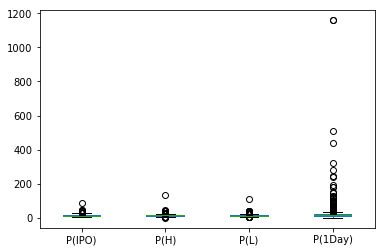

In [6]:
# Add Box Plots to further Describe the Data - for the Ps
df_p=df.iloc[:,3:7]
df_p.plot.box()

In [7]:
#Interpretation of above: All P variables are positively skewed, particularly P(1Day).

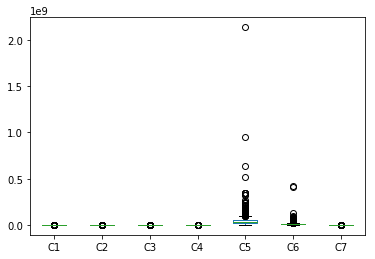

In [8]:
# Add Box Plots to further Describe the Data - for the Cs
df_p2=df.iloc[:,7:14]
df_p2.plot.box()

In [9]:
#Interpretation of above: All C variables are positively skewed, particularly C5.

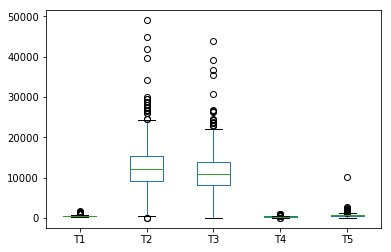

In [10]:
# Add Box Plots to further Describe the Data - for the Ts
df_p3=df.iloc[:,14:19]
df_p3.plot.box()

In [11]:
#Interpretation of above: All T variables are positively skewed, particularly T2 & T3.

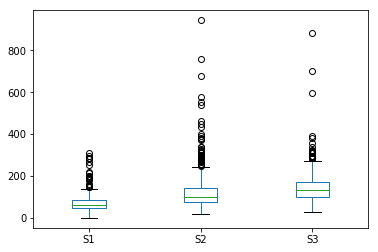

In [12]:
# Add Box Plots to further Describe the Data - for the Ss
df_p4=df.iloc[:,19:22]
df_p4.plot.box()

In [13]:
#Interpretation of above: All S variables are positively skewed.

In [14]:
df_copy = df.copy() # making a copy of the dataframe to preserve the original data

In [15]:
#Change the data types
df_copy.iloc[:,3:8].astype(float)
df_copy.iloc[:,9:].astype(float)
df_copy['C2'] = df_copy['C2'].astype('category')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [16]:
#Addressing negative ones found in the data
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,-1.0,55.0
134,643.0,-1.0


In [17]:
#Replace negative ones in the data with "Nan"
df_copy.iloc[7,18] = float('Nan')
df_copy.iloc[134,19] = float('Nan')
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,NaN,55.0
134,643.0,NaN


In [18]:
#Addressing the zeros found in columns T2 (Note: no zeros in T1)
df_copy.iloc[[125,199],[15]]

,T2
125,0.0
199,0.0


In [19]:
#Replace zeros in the data with "Nan"
df_copy.iloc[125,15] = float('Nan')
df_copy.iloc[199,15] = float('Nan')
df_copy.iloc[[125,199],[15]]

,T2
125,NaN
199,NaN


In [20]:
#Print list of entries with improper SIC codes
df_copy.iloc[[10,86,268,330,400,490,597,614,118,174,181,187,221,246,499,620],[0,1,2]]

,I1,I2,I3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN
86,BLT,BLOUNT INTERNATIONAL INC,NaN
268,GSL,GLOBAL SIGNAL INC,NaN
330,KFI,KKR Financial Holdings LLC,NaN
400,NAUH,"National American University Holdings, Inc.",NaN
490,RCH,"CHINA CGAME, INC.",NaN
597,TRMM,"Access to Money, Inc.",NaN
614,TZOO,TRAVELZOO INC,NaN
118,CERE,"Ceres, Inc.",100
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819"


In [21]:
#SIC 1191 should be 0191 and 1783 should be 0783 change later to deal with beginning zero.
#Also add code to bin the SIC code into text via dictionary (i.e., name of SIC Code category)
missing_I3 = ['8051','5122','6798','6199','8221','3200','6099','4724','5261','7812','1191','1783','7389','7389','3663','5065']

In [22]:
#Replace improper SIC codes with values ascertained via independent research
df_copy.iloc[[10,86,268,330,400,490,597,614,118,174,181,187,221,246,499,620],2] = missing_I3
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         679 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         680 non-null float64
S1         680 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


# Imputation Code

### Include a column to determine if the row needs imputing to keep track of changes by row


In [23]:
#df_mean = df_copy.fillna(df_copy.mean())
#df_median = df_copy.fillna(df_copy.median())
#df_mode = df_copy.fillna(df_copy.mode[0](dropna=True,numeric_only=True))

In [24]:
#df_median['C4'].head(25)

In [25]:
# Dawn's code
#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.

#fist make a copy of the dataframe to preserve the original data
df_impute_copy = df_copy.copy()

#Start with C2 - by determining the mode
df_impute_copy['C2'].mode()

#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.
# Include a column to determine if the row needs imputing to keep track of changes by row

#then impute median for P(IPO), P(H), P(L), P(1Day)
df_impute_copy['P(IPO)'].fillna(df_impute_copy['P(IPO)'].median(), inplace=True)
df_impute_copy['P(H)'].fillna(df_impute_copy['P(H)'].median(), inplace=True)
df_impute_copy['P(L)'].fillna(df_impute_copy['P(L)'].median(), inplace=True)
df_impute_copy['P(1Day)'].fillna(df_impute_copy['P(1Day)'].median(), inplace=True)

#now impute median for C1, C3, C4, C5, C6, C7
df_impute_copy['C1'].fillna(df_impute_copy['C1'].median(), inplace=True)
df_impute_copy['C3'].fillna(df_impute_copy['C3'].median(), inplace=True)
df_impute_copy['C4'].fillna(df_impute_copy['C4'].median(), inplace=True)
df_impute_copy['C5'].fillna(df_impute_copy['C5'].median(), inplace=True)
df_impute_copy['C6'].fillna(df_impute_copy['C6'].median(), inplace=True)
df_impute_copy['C7'].fillna(df_impute_copy['C7'].median(), inplace=True)

#now impute mode for C2...using the mode determined above (i.e., the series above with one number in it)
#df_impute_copy['C2'].fillna(1.0, inplace=True)
df_impute_copy['C2'].fillna(df_impute_copy['C2'].mode()[0],inplace=True)

#now impute median for T1, T2, T3, T4, T5
df_impute_copy['T1'].fillna(df_impute_copy['T1'].median(), inplace=True)
df_impute_copy['T2'].fillna(df_impute_copy['T2'].median(), inplace=True)
df_impute_copy['T3'].fillna(df_impute_copy['T3'].median(), inplace=True)
df_impute_copy['T4'].fillna(df_impute_copy['T4'].median(), inplace=True)
df_impute_copy['T5'].fillna(df_impute_copy['T5'].median(), inplace=True)

#now impute median for S1, S2, S3
df_impute_copy['S1'].fillna(df_impute_copy['S1'].median(), inplace=True)
df_impute_copy['S2'].fillna(df_impute_copy['S2'].median(), inplace=True)
df_impute_copy['S3'].fillna(df_impute_copy['S3'].median(), inplace=True)

#check work
df_impute_copy.head(15)

#Double-checking via "describe" - all imputation done except for C2
df_impute_copy.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000
mean,13.835191,15.474135,13.507493,25.577032,148.350440,1.695003,0.007342,4.916458e+07,1.237106e+07,458.587321,465.602639,12792.900293,11394.948680,294.331378,680.057185,68.498534,120.07478,144.743402
std,6.031536,6.604652,5.792972,72.068973,150.518513,158.309101,0.032777,1.039359e+08,2.502200e+07,1563.531760,175.614521,5401.665364,4836.172083,121.444797,471.856119,38.979729,84.77015,69.226629
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,0.000000,0.000000,167.000000,5.000000,20.00000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8168.000000,213.250000,463.250000,45.000000,73.00000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12049.000000,10785.000000,279.000000,624.500000,60.000000,100.00000,134.000000
75%,17.000000,17.000000,15.000000,20.087500,152.750000,0.440000,0.030941,4.936364e+07,1.193426e+07,289.758000,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.75000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.00000,883.000000


In [26]:
df_impute_copy.isnull().sum()

I1         0
I2         0
I3         0
P(IPO)     0
P(H)       0
P(L)       0
P(1Day)    0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
T1         0
T2         0
T3         0
T4         0
T5         0
S1         0
S2         0
S3         0
dtype: int64

In [27]:
#Add calculated fields

#Create P(mid) variable
df_impute_copy['P(mid)'] = (df_impute_copy['P(H)'] + df_impute_copy['P(L)']) / 2

#Create variable true_value for C6P
true_value = ((df_impute_copy['P(IPO)'] - df_impute_copy['P(mid)']) / df_impute_copy['P(mid)'])*100

# Add T1'=T4/T1 & S1'=S1/T2 Calcualte all the ratios for the Ts & S Colums
df_impute_copy['Long_to_Total_Sentences'] = df_impute_copy['T4'] / df_impute_copy['T1']
df_impute_copy['Pos_to_Total_Words'] = df_impute_copy['S1'] / df_impute_copy['T2']
df_impute_copy['Neg_to_Total_Words'] = df_impute_copy['S2'] / df_impute_copy['T2']
df_impute_copy['Uncertain_to_Total_Words'] = df_impute_copy['S3'] / df_impute_copy['T2']
df_impute_copy['Pos_Neg_Words'] = df_impute_copy['S1'] / df_impute_copy['S2']
df_impute_copy['Uncertain_to_Pos_Words'] = df_impute_copy['S3'] / df_impute_copy['S1']
df_impute_copy['Uncertain_to_Neg_Words'] = df_impute_copy['S3'] / df_impute_copy['S2']
df_impute_copy['Real_to_Total_Words'] = df_impute_copy['T3'] / df_impute_copy['T2']
df_impute_copy['Long_to_Total_Words'] = df_impute_copy['T5'] / df_impute_copy['T2']

#Create new columns for "prime" variables
#Add them to df_impute_copy
df_impute_copy['C3P'] = np.where(df_impute_copy['C3'] > 0, '1', '0')
df_impute_copy['C5P'] = df_impute_copy['C5'] / df_impute_copy['C6']
df_impute_copy['C6P'] = np.where(df_impute_copy['P(IPO)'] > df_impute_copy['P(mid)'], true_value, '0')
df_impute_copy['Y1'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(mid)'], '1', '0')
df_impute_copy['Y2'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(1Day)'], '1', '0')



#if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
    #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
#else :
    #df_alt_copy['C6P'] = 0

df_impute_copy.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.529915,2.241935,1.188034,0.908876,0.054250,1,3.864345,11.11111111111111,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.293388,3.338028,0.979339,0.898724,0.051395,0,12.028832,0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,1.848485,0.983607,1.818182,0.909350,0.061764,0,3.369134,0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,1.355932,1.375000,1.864407,0.917060,0.061630,0,3.299697,0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.449664,2.492537,1.120805,0.888469,0.048550,1,3.726269,5.0,0,1


In [28]:
df_impute_copy[['C6P','I3','C3P']] = df_impute_copy[['C6P','I3','C3P']].astype('float')
df_impute_copy.dtypes

I1                            object
I2                            object
I3                           float64
P(IPO)                       float64
P(H)                         float64
P(L)                         float64
P(1Day)                      float64
C1                           float64
C2                          category
C3                           float64
C4                           float64
C5                           float64
C6                           float64
C7                           float64
T1                           float64
T2                           float64
T3                           float64
T4                           float64
T5                           float64
S1                           float64
S2                           float64
S3                           float64
P(mid)                       float64
Long_to_Total_Sentences      float64
Pos_to_Total_Words           float64
Neg_to_Total_Words           float64
Uncertain_to_Total_Words     float64
P

## Subsetting the data into separate dataframes: continuous, non-continuous, evaluation list

In [29]:
# creating a list of the continuous columns that may need to be normalized.

categorical_list = df_impute_copy.columns.tolist() # This includes C2, I1, I2, and I3...
del categorical_list[9:-2]
del categorical_list[3:8]
categorical_list = ['C2','I1', 'I2', 'I3', 'Y1', 'Y2']
print(categorical_list)

col_list = df_impute_copy.columns.tolist() # This excludes C2, I1, I2, and I3...NEED TO EXCLUDE THE CATEGORICALS FROM HERE
del col_list[0:4]
del col_list[4]
print(col_list)

# Create a list of columns to use in the evaluation code baseline
eval_list = df_impute_copy.columns.tolist()
del eval_list[0:7]
del eval_list[1]
del eval_list[6:14]
print(eval_list)


['C2', 'I1', 'I2', 'I3', 'Y1', 'Y2']
['P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'P(mid)', 'Long_to_Total_Sentences', 'Pos_to_Total_Words', 'Neg_to_Total_Words', 'Uncertain_to_Total_Words', 'Pos_Neg_Words', 'Uncertain_to_Pos_Words', 'Uncertain_to_Neg_Words', 'Real_to_Total_Words', 'Long_to_Total_Words', 'C3P', 'C5P', 'C6P', 'Y1', 'Y2']
['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'P(mid)', 'Long_to_Total_Sentences', 'Pos_to_Total_Words', 'Neg_to_Total_Words', 'Uncertain_to_Total_Words', 'Pos_Neg_Words', 'Uncertain_to_Pos_Words', 'Uncertain_to_Neg_Words', 'Real_to_Total_Words', 'Long_to_Total_Words', 'C3P', 'C5P', 'C6P', 'Y1', 'Y2']


In [30]:
df_impute_copy.dtypes

I1                            object
I2                            object
I3                           float64
P(IPO)                       float64
P(H)                         float64
P(L)                         float64
P(1Day)                      float64
C1                           float64
C2                          category
C3                           float64
C4                           float64
C5                           float64
C6                           float64
C7                           float64
T1                           float64
T2                           float64
T3                           float64
T4                           float64
T5                           float64
S1                           float64
S2                           float64
S3                           float64
P(mid)                       float64
Long_to_Total_Sentences      float64
Pos_to_Total_Words           float64
Neg_to_Total_Words           float64
Uncertain_to_Total_Words     float64
P

# Visualization of the data

In [31]:
df_continuous = df_impute_copy.loc[:,eval_list]

In [32]:
# #NOTE: NEED TO REDO RANGE FOR ADDED COLUMNS
# p_df = df_continuous.iloc[:,:3].dropna()
# sns.pairplot(p_df, dropna =False)
# c_df = df_continuous.iloc[:,3:10].dropna()
# sns.pairplot(c_df, dropna =False)
# t_df = df_continuous.iloc[:,10:15].dropna()
# sns.pairplot(t_df, dropna =False)
# s_df = df_continuous.iloc[:,15:19].dropna()
# sns.pairplot(s_df, dropna =False)
# calc_df = df_continuous.iloc[:,19:25].dropna()
# sns.pairplot(calc_df, dropna =False)
# calc2_df = df_continuous.iloc[:,25:].dropna()
# sns.pairplot(calc2_df, dropna =False)


In [33]:
#Check skewness again
eval_list
df_continuous.skew()

C1                           5.747573
C3                          21.158769
C4                          -0.491134
C5                          13.659056
C6                          12.613291
C7                          12.348960
P(mid)                       8.292727
Long_to_Total_Sentences      0.080198
Pos_to_Total_Words          20.997011
Neg_to_Total_Words          10.311764
Uncertain_to_Total_Words    22.205613
Pos_Neg_Words                1.809010
Uncertain_to_Pos_Words       1.568628
Uncertain_to_Neg_Words       1.236902
Real_to_Total_Words         25.575293
Long_to_Total_Words         26.111496
C3P                         -0.117764
C5P                         10.648354
C6P                          4.396060
Y1                          -0.052921
Y2                          -0.894757
dtype: float64

In [34]:
#Interpretation: All but C4 & Long_to_Total_Sentences and C3P are outside of the "acceptable" range of -1 to +1

In [35]:
df_eval_base = df_impute_copy[eval_list]
df_eval_base.iloc[:,:].astype(float)

,C1,C3,C4,C5,C6,C7,P(mid),Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,...,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P,Y1,Y2
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,9.0,0.640426,0.004875,0.009199,...,0.529915,2.241935,1.188034,0.908876,0.054250,1.0,3.864345,11.111111,0.0,1.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,9.0,0.644753,0.003258,0.011105,...,0.293388,3.338028,0.979339,0.898724,0.051395,0.0,12.028832,0.000000,1.0,0.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,13.0,0.636816,0.011593,0.006271,...,1.848485,0.983607,1.818182,0.909350,0.061764,0.0,3.369134,0.000000,1.0,0.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,15.0,0.539634,0.009686,0.007144,...,1.355932,1.375000,1.864407,0.917060,0.061630,0.0,3.299697,0.000000,1.0,1.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,20.0,0.587413,0.004518,0.010047,...,0.449664,2.492537,1.120805,0.888469,0.048550,1.0,3.726269,5.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,317.0,-0.37,0.004670,38386565.0,9684109.0,186.101,15.0,0.612663,0.006512,0.007935,...,0.820755,1.988506,1.632075,0.920952,0.050603,0.0,3.963872,20.000000,0.0,1.0
678,98.0,-0.41,0.058689,32758082.0,7000000.0,25.461,15.0,0.647177,0.005069,0.009124,...,0.555556,2.471429,1.373016,0.906227,0.056770,0.0,4.679726,0.000000,1.0,1.0
679,112.0,0.60,0.030425,11479826.0,3125000.0,55.431,8.0,0.647761,0.004191,0.009044,...,0.463415,2.368421,1.097561,0.889600,0.047976,1.0,3.673544,0.000000,0.0,0.0
680,78.0,0.20,0.032284,13180261.0,3125000.0,117.857,16.0,0.710938,0.006773,0.005362,...,1.263158,2.083333,2.631579,0.909412,0.043178,1.0,4.217684,18.750000,0.0,0.0


In [36]:
df_eval_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 21 columns):
C1                          682 non-null float64
C3                          682 non-null float64
C4                          682 non-null float64
C5                          682 non-null float64
C6                          682 non-null float64
C7                          682 non-null float64
P(mid)                      682 non-null float64
Long_to_Total_Sentences     682 non-null float64
Pos_to_Total_Words          682 non-null float64
Neg_to_Total_Words          682 non-null float64
Uncertain_to_Total_Words    682 non-null float64
Pos_Neg_Words               682 non-null float64
Uncertain_to_Pos_Words      682 non-null float64
Uncertain_to_Neg_Words      682 non-null float64
Real_to_Total_Words         682 non-null float64
Long_to_Total_Words         682 non-null float64
C3P                         682 non-null float64
C5P                         682 non-null float64
C6P          

In [37]:
# create a subset of columns to normalize - dropping Y1, Y2 and C3
norm_sublist = df_eval_base.columns.tolist()
del norm_sublist[-2:]
del norm_sublist[1]
norm_sublist

['C1',
 'C4',
 'C5',
 'C6',
 'C7',
 'P(mid)',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Uncertain_to_Total_Words',
 'Pos_Neg_Words',
 'Uncertain_to_Pos_Words',
 'Uncertain_to_Neg_Words',
 'Real_to_Total_Words',
 'Long_to_Total_Words',
 'C3P',
 'C5P',
 'C6P']

In [38]:
# create a subset of columns to normalize - dropping C5, C6
del norm_sublist[2:4]
norm_sublist

['C1',
 'C4',
 'C7',
 'P(mid)',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Uncertain_to_Total_Words',
 'Pos_Neg_Words',
 'Uncertain_to_Pos_Words',
 'Uncertain_to_Neg_Words',
 'Real_to_Total_Words',
 'Long_to_Total_Words',
 'C3P',
 'C5P',
 'C6P']

In [39]:
# create a subset of columns to normalize - dropping P(mid)
del norm_sublist[3]
norm_sublist

['C1',
 'C4',
 'C7',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Uncertain_to_Total_Words',
 'Pos_Neg_Words',
 'Uncertain_to_Pos_Words',
 'Uncertain_to_Neg_Words',
 'Real_to_Total_Words',
 'Long_to_Total_Words',
 'C3P',
 'C5P',
 'C6P']

In [40]:
norm_df = df_eval_base.loc[:,norm_sublist]

In [41]:
#RUN EVALUATION CODE AND THAT ENDS "BEGINNING OF THE PIPELINE"
#df_eval_base.to_csv("evalbase.csv", index=False)

In [42]:
for feature in norm_sublist:
    print (feature, "Shapiro test stat & p-value is",stats.shapiro(norm_df[feature]))
    print (feature, "skew is",norm_df[feature].skew())
    

C1 Shapiro test stat & p-value is (0.5307254791259766, 4.769476268757519e-39)
C1 skew is 5.747573481594514
C4 Shapiro test stat & p-value is (0.984647810459137, 1.4011792472956586e-06)
C4 skew is -0.491134301597051
C7 Shapiro test stat & p-value is (0.24965006113052368, 1.401298464324817e-45)
C7 skew is 12.348960384656746
Long_to_Total_Sentences Shapiro test stat & p-value is (0.8640879392623901, 7.682332969547497e-24)
Long_to_Total_Sentences skew is 0.08019803376082925
Pos_to_Total_Words Shapiro test stat & p-value is (0.22569334506988525, 0.0)
Pos_to_Total_Words skew is 20.99701132387033
Neg_to_Total_Words Shapiro test stat & p-value is (0.5621353387832642, 4.2899006467417726e-38)
Neg_to_Total_Words skew is 10.311764261719535
Uncertain_to_Total_Words Shapiro test stat & p-value is (0.1819603443145752, 0.0)
Uncertain_to_Total_Words skew is 22.205613280000033
Pos_Neg_Words Shapiro test stat & p-value is (0.8755862712860107, 6.609227494146715e-23)
Pos_Neg_Words skew is 1.809009549521612

# Normalization Code

In [43]:
n=682
for feature in norm_sublist:
    norm_name = feature + "_norm"
    if norm_df[feature].skew()>0.5:
        norm_df[norm_name] = np.cbrt(norm_df[feature])
    elif norm_df[feature].skew()<-0.5:
        norm_df[norm_name] = np.power(norm_df[feature],2)
    else: norm_df[norm_name] = norm_df[feature]

In [44]:
normalized_df = norm_df.iloc[:,15:]
normalized_df

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
0,4.959676,0.029074,3.716773,0.640426,0.169556,0.209529,0.221915,0.809224,1.308803,1.059115,0.968653,0.378558,1.0,1.569249,2.231443
1,6.374311,-0.013352,2.960063,0.644753,0.148247,0.223103,0.221556,0.664479,1.494503,0.993065,0.965033,0.371798,0.0,2.291261,0.000000
2,4.481405,0.020715,1.946762,0.636816,0.226322,0.184411,0.225078,1.227266,0.994505,1.220522,0.968821,0.395285,0.0,1.499130,0.000000
3,5.934472,0.020023,2.042906,0.539634,0.213167,0.192593,0.237040,1.106826,1.111990,1.230779,0.971552,0.395000,0.0,1.488760,0.000000
4,4.308869,-0.034895,8.583029,0.587413,0.165315,0.215782,0.224143,0.766119,1.355857,1.038748,0.961348,0.364808,1.0,1.550332,1.709976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6.818462,0.004670,5.709301,0.612663,0.186745,0.199455,0.234832,0.936277,1.257503,1.177371,0.972924,0.369877,0.0,1.582607,2.714418
678,4.610436,0.058689,2.941881,0.647177,0.171778,0.208958,0.232247,0.822071,1.352019,1.111455,0.967711,0.384333,0.0,1.672657,0.000000
679,4.820285,0.030425,3.812860,0.647761,0.161228,0.208345,0.214911,0.773850,1.332968,1.031517,0.961756,0.363364,1.0,1.542985,0.000000
680,4.272659,0.032284,4.902886,0.710938,0.189202,0.175028,0.241646,1.080984,1.277182,1.380614,0.968843,0.350822,1.0,1.615690,2.656646


In [45]:
for feature in normalized_df.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df[feature]))
    print (feature, "skew is",normalized_df[feature].skew())
    

C1_norm skew is 1.6670906896241842
C4_norm skew is -0.491134301597051
C7_norm skew is 2.055053773524643
Long_to_Total_Sentences_norm skew is 0.08019803376082925
Pos_to_Total_Words_norm skew is 4.425592249842927
Neg_to_Total_Words_norm skew is 1.9069870991922613
Uncertain_to_Total_Words_norm skew is 7.088547562331239
Pos_Neg_Words_norm skew is 0.6156356209029602
Uncertain_to_Pos_Words_norm skew is 0.6135678017765657
Uncertain_to_Neg_Words_norm skew is 0.31556612519357335
Real_to_Total_Words_norm skew is 3.183820652884444
Long_to_Total_Words_norm skew is 24.742256774243124
C3P_norm skew is -0.1177635000217479
C5P_norm skew is 3.6503560111856985
C6P_norm skew is 0.8365537504959126


In [46]:
normalized_df.describe()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,5.001064,0.007342,5.525488,0.628061,0.173156,0.206521,0.225052,0.845994,1.313267,1.099904,0.961929,0.376312,0.529326,1.585169,0.851263
std,1.172495,0.032777,3.496865,0.083532,0.022469,0.023696,0.023366,0.121093,0.162719,0.134018,0.090029,0.090398,0.499506,0.328711,1.152903
min,2.154435,-0.162352,0.419834,0.000000,0.111572,0.129115,0.172413,0.510873,0.878891,0.662011,0.000000,0.316137,0.000000,0.656714,0.000000
25%,4.396830,-0.013352,3.462496,0.579954,0.160756,0.191579,0.212310,0.766306,1.202210,1.010640,0.959552,0.361937,0.000000,1.418370,0.000000
50%,4.747459,0.009125,4.700151,0.629015,0.171717,0.204827,0.224406,0.835747,1.300591,1.093273,0.964463,0.372994,1.000000,1.550993,0.000000
75%,5.345562,0.030941,6.617263,0.674852,0.184281,0.219216,0.234427,0.917045,1.401347,1.183219,0.968957,0.383579,1.000000,1.694455,1.925857
max,12.779312,0.092896,31.306362,1.443089,0.495210,0.449929,0.615694,1.340242,1.969982,1.598660,2.579578,2.691650,1.000000,4.638295,4.641589


In [47]:
# p_df = df_impute_copy.iloc[:,55:58]
# sns.pairplot(p_df, dropna =False)
# c_df = df_impute_copy.iloc[:,58:64]
# sns.pairplot(c_df, dropna =False,hue="C2")
# t_df = df_impute_copy.iloc[:,64:69]
# sns.pairplot(t_df, dropna =False)
# s_df = df_impute_copy.iloc[:,69:]
# sns.pairplot(s_df, dropna =False)

# Standardization Code for IQR - added by DWM 2/20/20

In [48]:
# sourced from - https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

def norm_df_outlier(datacolumn):
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    datacolumn[datacolumn>upper_range] = upper_range
    datacolumn[datacolumn<lower_range] = lower_range
    return datacolumn

In [49]:
normalized_df_copy = normalized_df.copy()
normalized_df_copy.apply(norm_df_outlier)

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
0,4.959676,0.029074,3.716773,0.640426,0.169556,0.209529,0.221915,0.809224,1.308803,1.059115,0.968653,0.378558,1.0,1.569249,2.231443
1,6.374311,-0.013352,2.960063,0.644753,0.148247,0.223103,0.221556,0.664479,1.494503,0.993065,0.965033,0.371798,0.0,2.108582,0.000000
2,4.481405,0.020715,1.946762,0.636816,0.219569,0.184411,0.225078,1.143155,0.994505,1.220522,0.968821,0.395285,0.0,1.499130,0.000000
3,5.934472,0.020023,2.042906,0.539634,0.213167,0.192593,0.237040,1.106826,1.111990,1.230779,0.971552,0.395000,0.0,1.488760,0.000000
4,4.308869,-0.034895,8.583029,0.587413,0.165315,0.215782,0.224143,0.766119,1.355857,1.038748,0.961348,0.364808,1.0,1.550332,1.709976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6.768660,0.004670,5.709301,0.612663,0.186745,0.199455,0.234832,0.936277,1.257503,1.177371,0.972924,0.369877,0.0,1.582607,2.714418
678,4.610436,0.058689,2.941881,0.647177,0.171778,0.208958,0.232247,0.822071,1.352019,1.111455,0.967711,0.384333,0.0,1.672657,0.000000
679,4.820285,0.030425,3.812860,0.647761,0.161228,0.208345,0.214911,0.773850,1.332968,1.031517,0.961756,0.363364,1.0,1.542985,0.000000
680,4.272659,0.032284,4.902886,0.710938,0.189202,0.175028,0.241646,1.080984,1.277182,1.380614,0.968843,0.350822,1.0,1.615690,2.656646


In [50]:
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1_norm skew is 0.4212349048679974
C4_norm skew is -0.30863466620782026
C7_norm skew is 0.7525853562265388
Long_to_Total_Sentences_norm skew is -0.06924971476926904
Pos_to_Total_Words_norm skew is 0.18830009257405214
Neg_to_Total_Words_norm skew is 0.36262982554102074
Uncertain_to_Total_Words_norm skew is 0.2061518860272196
Pos_Neg_Words_norm skew is 0.3566497834316203
Uncertain_to_Pos_Words_norm skew is 0.37366599905717457
Uncertain_to_Neg_Words_norm skew is 0.19487403510509183
Real_to_Total_Words_norm skew is -0.5390631327833935
Long_to_Total_Words_norm skew is -0.055763106707359025
C3P_norm skew is -0.1177635000217479
C5P_norm skew is 0.27796769178785435
C6P_norm skew is 0.8365537504959126


In [51]:
#Conclusion: 3 still out of acceptable range: C7_norm, Real_to_Total_Words_norm and C6P_norm
#Although Real_to_Total_Words_norm is very close....

In [52]:
# MIN-MAX NORMALIZATION
# Code for min-max normalization found at Stackoverflow - see here:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

x = normalized_df_copy.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df_copy = pd.DataFrame(x_scaled, columns= normalized_df.columns.tolist())
normalized_df_copy

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
0,0.523315,0.630418,0.301653,0.534307,0.468520,0.537374,0.483577,0.446179,0.508819,0.445221,0.616924,0.566997,1.0,0.511624,0.480750
1,0.896085,0.384735,0.232418,0.545709,0.242077,0.660165,0.479516,0.206121,0.741949,0.349541,0.520694,0.488909,0.0,1.000000,0.000000
2,0.397286,0.582011,0.139706,0.524798,1.000000,0.310164,0.519329,1.000000,0.114245,0.679038,0.621395,0.760235,0.0,0.448130,0.000000
3,0.780184,0.578004,0.148503,0.268780,0.931974,0.384178,0.654541,0.939749,0.261737,0.693896,0.693975,0.756934,0.0,0.438740,0.000000
4,0.351822,0.259982,0.746890,0.394649,0.423448,0.593936,0.508757,0.374690,0.567891,0.415717,0.422751,0.408157,1.0,0.494494,0.368403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.000000,0.489094,0.483959,0.461169,0.651184,0.446242,0.629582,0.656896,0.444416,0.616529,0.730458,0.466721,0.0,0.523720,0.584804
678,0.431287,0.801912,0.230754,0.552094,0.492136,0.532208,0.600366,0.467486,0.563072,0.521042,0.591883,0.633711,0.0,0.605261,0.000000
679,0.486584,0.638242,0.310444,0.553632,0.380018,0.526665,0.404408,0.387512,0.539156,0.405242,0.433583,0.391481,1.0,0.487841,0.000000
680,0.342280,0.649007,0.410176,0.720065,0.677299,0.225282,0.706602,0.896891,0.469122,0.910948,0.621976,0.246593,1.0,0.553677,0.572357


In [53]:
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1_norm skew is 0.42123490486799753
C4_norm skew is -0.3086346662078202
C7_norm skew is 0.7525853562265387
Long_to_Total_Sentences_norm skew is -0.06924971476927116
Pos_to_Total_Words_norm skew is 0.18830009257405292
Neg_to_Total_Words_norm skew is 0.36262982554102174
Uncertain_to_Total_Words_norm skew is 0.20615188602721815
Pos_Neg_Words_norm skew is 0.3566497834316194
Uncertain_to_Pos_Words_norm skew is 0.3736659990571781
Uncertain_to_Neg_Words_norm skew is 0.19487403510509335
Real_to_Total_Words_norm skew is -0.5390631327834303
Long_to_Total_Words_norm skew is -0.055763106707357145
C3P_norm skew is -0.1177635000217479
C5P_norm skew is 0.2779676917878527
C6P_norm skew is 0.8365537504959132


In [54]:
# HMMM...NO CHANGE FROM PRIOR RESULTS.... STILL THE SAME 3 AND STILL THE SAME NUMBERS! DID WE DO THIS PART RIGHT?
# OR, DOES IT JUST MEAN WE'VE GOTTEN AS CLOSE AS WE ARE GOING TO GET?

# Z- Score Code

In [55]:
# Z-SCORE STANDARDIZATION CODE from DAWN
#Here, I found code at Stackoverflow:
#https://stackoverflow.com/questions/50194821/why-normalization-using-z-score-in-pandas-dataframe-generates-nan-columns

#import numpy as np
#import pandas as pd
#from scipy import stats
from scipy.stats import zscore

#df = pd.DataFrame(pd.read_csv('dataset.csv', sep=','))
#df = df.dropna(how='any') # drop nan entries
#df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers

#print(df.describe())
normalized_df_copy = normalized_df_copy.apply(zscore) # Normalization
normalized_df_copy.describe()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02
mean,5.209258e-18,2.344166e-17,8.595275e-17,-7.566447e-16,2.448351e-16,-4.492985e-16,6.719942e-16,1.693009e-16,1.614870e-16,4.948795e-17,1.093944e-16,2.116261e-16,1.510685e-16,-2.604629e-18,2.604629e-17
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00
min,-2.218242e+00,-2.718300e+00,-1.779262e+00,-2.716197e+00,-2.554791e+00,-2.625380e+00,-2.647261e+00,-2.615062e+00,-2.603816e+00,-2.653803e+00,-2.279601e+00,-2.644895e+00,-1.060477e+00,-2.455199e+00,-7.389068e-01
25%,-5.963278e-01,-6.497646e-01,-6.652215e-01,-6.910781e-01,-6.457869e-01,-6.818597e-01,-7.019447e-01,-6.725541e-01,-6.966774e-01,-6.762435e-01,-4.982604e-01,-6.690053e-01,-1.060477e+00,-6.466213e-01,-7.389068e-01
50%,-1.967128e-01,5.002520e-02,-2.120667e-01,6.897159e-03,-5.278939e-02,-6.078215e-02,7.347281e-03,-7.598608e-02,-6.854270e-02,-4.498864e-02,1.218796e-01,3.968530e-03,9.429723e-01,-6.743087e-02,-7.389068e-01
75%,4.849482e-01,7.292587e-01,4.898647e-01,6.590012e-01,6.268825e-01,6.138203e-01,5.949331e-01,6.224511e-01,5.747480e-01,6.421295e-01,6.893002e-01,6.482543e-01,9.429723e-01,5.590970e-01,9.327605e-01
max,2.106862e+00,2.658213e+00,2.222494e+00,2.684120e+00,2.535887e+00,2.557340e+00,2.540250e+00,2.564959e+00,2.481886e+00,2.619689e+00,2.470641e+00,2.624144e+00,9.429723e-01,2.367674e+00,3.290049e+00


In [56]:
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1_norm skew is 0.42123490486799753
C4_norm skew is -0.30863466620782004
C7_norm skew is 0.7525853562265387
Long_to_Total_Sentences_norm skew is -0.0692497147692689
Pos_to_Total_Words_norm skew is 0.18830009257405217
Neg_to_Total_Words_norm skew is 0.36262982554102313
Uncertain_to_Total_Words_norm skew is 0.20615188602721574
Pos_Neg_Words_norm skew is 0.35664978343161885
Uncertain_to_Pos_Words_norm skew is 0.37366599905717773
Uncertain_to_Neg_Words_norm skew is 0.19487403510509335
Real_to_Total_Words_norm skew is -0.5390631327834304
Long_to_Total_Words_norm skew is -0.05576310670735747
C3P_norm skew is -0.11776350002174833
C5P_norm skew is 0.2779676917878525
C6P_norm skew is 0.8365537504959129


In [57]:
# HMMM...NO CHANGE FROM PRIOR RESULTS.... STILL THE SAME 3 AND STILL THE SAME NUMBERS! DID WE DO THIS PART RIGHT?
# OR, DOES IT JUST MEAN WE'VE GOTTEN AS CLOSE AS WE ARE GOING TO GET?

# STD OUTLIER Detection

In [58]:
# STANDARD DEVIATION OUTLIERS CODE...OBVIOUSLY THIS ONE'S NOT WORKING....
# Code was found here: https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html

def std_df_outlier(datacolumn):
    mean = np.mean(datacolumn, axis=0)
    sd = np.std(datacolumn, axis=0) 
    datacolumn[datacolumn<(mean - 2 * sd)] = mean
    datacolumn[datacolumn>(mean + 2 * sd)] = mean
    return datacolumn

normalized_df_copy.apply(std_df_outlier)
normalized_df_copy.describe()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,682.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000,6.820000e+02,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000
mean,-0.130424,0.052339,-0.184305,1.975349e-02,-0.024473,-0.083405,-5.220767e-02,-0.076976,-0.056933,-0.058181,0.114359,1.814395e-02,1.510685e-16,-0.051383,-0.053523
std,0.509272,0.876680,0.748492,8.625031e-01,0.817595,0.833711,8.220290e-01,0.847329,0.847410,0.819201,0.769244,8.319527e-01,1.000734e+00,0.769560,0.924811
min,-1.299602,-1.949618,-1.779262,-1.996925e+00,-1.901677,-1.984131,-1.998993e+00,-1.959080,-1.947811,-1.990874,-1.961091,-1.999528e+00,-1.060477e+00,-1.980849,-0.738907
25%,-0.481090,-0.542048,-0.665222,-5.972649e-01,-0.611775,-0.647680,-6.636878e-01,-0.652603,-0.662392,-0.632269,-0.300771,-5.749816e-01,-1.060477e+00,-0.578711,-0.738907
50%,-0.113714,0.050025,-0.212067,-7.566447e-16,-0.007199,-0.048106,6.719942e-16,-0.055485,-0.028459,-0.011370,0.092440,2.116261e-16,9.429723e-01,-0.002334,-0.738907
75%,0.014093,0.714294,0.167854,5.992023e-01,0.517972,0.454558,5.056702e-01,0.501755,0.478347,0.517886,0.669878,5.668312e-01,9.429723e-01,0.415582,0.932760
max,1.303902,1.952655,1.985773,1.994674e+00,1.993815,1.987343,1.968506e+00,1.998492,1.987934,1.992181,1.892298,1.997445e+00,9.429723e-01,1.998054,1.958209


In [59]:
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1_norm skew is 0.5551825737998839
C4_norm skew is -0.17138944342763446
C7_norm skew is 0.4049044052563405
Long_to_Total_Sentences_norm skew is -0.012249578093206037
Pos_to_Total_Words_norm skew is 0.17439660298569834
Neg_to_Total_Words_norm skew is 0.09982792955690091
Uncertain_to_Total_Words_norm skew is 0.02245474008832112
Pos_Neg_Words_norm skew is 0.12382258974012474
Uncertain_to_Pos_Words_norm skew is 0.20754603974787397
Uncertain_to_Neg_Words_norm skew is -0.027056723990997827
Real_to_Total_Words_norm skew is -0.38722705989501166
Long_to_Total_Words_norm skew is 0.0418176232263697
C3P_norm skew is -0.11776350002174833
C5P_norm skew is 0.2003620828113871
C6P_norm skew is 0.7363351963503543


In [60]:
# CONCLUSION - ALL ARE WITHIN ACCEPTABLE RANGE NOW, EXCEPT C1_norm (although just barely out of range) and C6P_norm
# BUT - the two out of range are within the expanded range of -1 to 1....

# Correlation Code

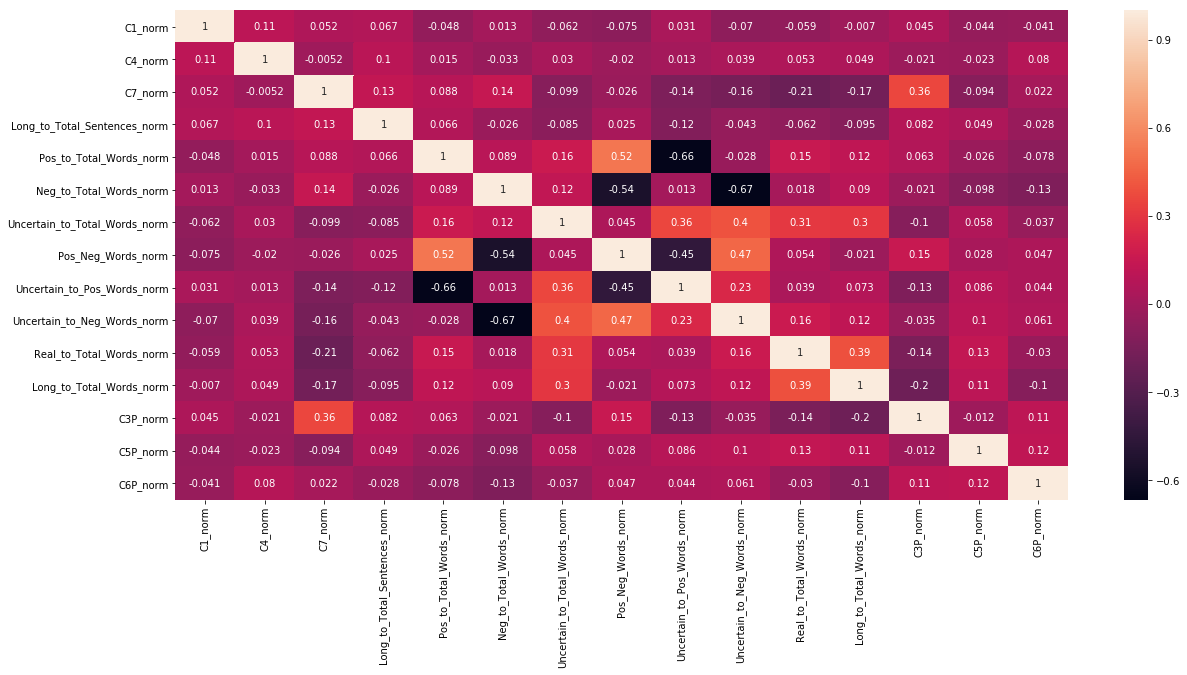

In [61]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
# Add Corr with functions
spearman =normalized_df_copy.corr(method ='spearman')
pl.figure(figsize=(20,9))
sns.heatmap(spearman, annot=True)

In [62]:
#Conclusion - new 2/26/20 DWM: 
#In light of the above, we have decided to exclude the following variables:

# Pos_Neg_Words_norm, which has sizeable intercorrlations with Neg_to_Total_Words_norm (-), Uncertain_to_Pos_Words_norm (-)
#    Pos_to_Total_Words_norm (+) and Uncertain_to_Negative_Words_norm (+)

# Uncertain_to_Pos_Words_norm, which has sizeable intercorrlations with Pos_to_Total_Words_norm (-), Uncertain_to_Total_Words_norm (+),
#    Pos_Neg_Words_norm (-), Uncertain_to_Neg_Words_norm (+)

# Uncertain_to_Neg_Words_norm, which has sizeable intercorrlations with Neg_to_Total_Words_norm (-), Pos_Neg_Words_norm (+),
#    Uncertain_to_Total_Words_norm (+), Uncertain_to_Pos_Words_norm (+)

In [63]:
#Removing the variables noted above

post_corr_list = normalized_df.columns.tolist()
normalized_df_copy.drop(normalized_df_copy.columns[[7,8,9]], axis=1, inplace=True)
normalized_df_copy

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
0,4.515138e-02,0.671152,-5.721207e-01,0.169230,-1.697078e-01,0.159680,-0.138702,0.650936,0.342634,0.942972,1.229957e-02,1.198013
1,-9.573025e-02,-0.649765,-8.491824e-01,0.230803,-1.322456e+00,0.796069,-0.159764,0.193821,-0.068812,-1.060477,-2.604629e-18,-0.738907
2,-4.999370e-01,0.410889,-1.220193e+00,0.117878,2.448351e-16,-1.017887,0.046763,0.672176,1.360811,-1.060477,-2.939239e-01,-0.738907
3,1.156133e+00,0.389348,-1.184990e+00,-1.264698,2.448351e-16,-0.634295,0.748176,1.016946,1.343418,-1.060477,-3.392135e-01,-0.738907
4,-6.965767e-01,-1.320500,1.209611e+00,-0.584969,-3.991537e-01,0.452826,-0.008078,-0.271432,-0.494301,0.942972,-7.031603e-02,0.745373
...,...,...,...,...,...,...,...,...,...,...,...,...
677,5.209258e-18,-0.088679,1.574234e-01,-0.225740,7.601757e-01,-0.312633,0.618704,1.190249,-0.185722,-1.060477,7.063708e-02,1.617241
678,-3.528789e-01,1.593192,-8.558396e-01,0.265288,-4.948427e-02,0.132906,0.467145,0.531986,0.694152,-1.060477,4.639005e-01,-0.738907
679,-1.137136e-01,0.713216,-5.369393e-01,0.273593,-6.202403e-01,0.104176,-0.549390,-0.219976,-0.582165,0.942972,-1.024011e-01,-0.738907
680,-7.378462e-01,0.771095,-1.378373e-01,1.172383,8.931201e-01,-1.457806,1.018244,0.674936,-1.345586,0.942972,2.151148e-01,1.567095


# Adding back the categorical variables

In [148]:
normalized_df_copy[categorical_list] = df_impute_copy.loc[:,categorical_list]
normalized_df_copy

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2
0,4.515138e-02,0.671152,-5.721207e-01,0.169230,-1.697078e-01,0.159680,-0.138702,0.650936,0.342634,0.942972,1.229957e-02,1.198013,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,0,1
1,-9.573025e-02,-0.649765,-8.491824e-01,0.230803,-1.322456e+00,0.796069,-0.159764,0.193821,-0.068812,-1.060477,-2.604629e-18,-0.738907,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,1,0
2,-4.999370e-01,0.410889,-1.220193e+00,0.117878,2.448351e-16,-1.017887,0.046763,0.672176,1.360811,-1.060477,-2.939239e-01,-0.738907,1.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,1,0
3,1.156133e+00,0.389348,-1.184990e+00,-1.264698,2.448351e-16,-0.634295,0.748176,1.016946,1.343418,-1.060477,-3.392135e-01,-0.738907,1.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,1,1
4,-6.965767e-01,-1.320500,1.209611e+00,-0.584969,-3.991537e-01,0.452826,-0.008078,-0.271432,-0.494301,0.942972,-7.031603e-02,0.745373,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,5.209258e-18,-0.088679,1.574234e-01,-0.225740,7.601757e-01,-0.312633,0.618704,1.190249,-0.185722,-1.060477,7.063708e-02,1.617241,1.0,ZIP,ZIPCAR INC,7514.0,0,1
678,-3.528789e-01,1.593192,-8.558396e-01,0.265288,-4.948427e-02,0.132906,0.467145,0.531986,0.694152,-1.060477,4.639005e-01,-0.738907,1.0,ZLTQ,Zeltiq Aesthetics Inc,3845.0,1,1
679,-1.137136e-01,0.713216,-5.369393e-01,0.273593,-6.202403e-01,0.104176,-0.549390,-0.219976,-0.582165,0.942972,-1.024011e-01,-0.738907,0.0,ZSTN,"ZST Digital Networks, Inc.",3663.0,0,0
680,-7.378462e-01,0.771095,-1.378373e-01,1.172383,8.931201e-01,-1.457806,1.018244,0.674936,-1.345586,0.942972,2.151148e-01,1.567095,1.0,ZUMZ,Zumiez Inc,5600.0,0,0


In [149]:
# # evaluates ranked variables or ordinal
# # used if we have not normalized first
# # prefered in small samples or if there are outliers
# # more accurate than spearman
# kendall = norm_df.corr(method ='kendall')
# sns.heatmap(kendall, annot=True)

In [150]:
# # used to evaluate continuous variables
# # is prefered for our dataset
# # need to normalize before we calcualte
# pearson = norm_df.corr(method ='pearson')
# sns.heatmap(pearson, annot=True)

# Outlier Detection from TAO
 ### to be adjsuted

# Binning Code from Tao

In [151]:
normalized_df_copy.dtypes

C1_norm                           float64
C4_norm                           float64
C7_norm                           float64
Long_to_Total_Sentences_norm      float64
Pos_to_Total_Words_norm           float64
Neg_to_Total_Words_norm           float64
Uncertain_to_Total_Words_norm     float64
Real_to_Total_Words_norm          float64
Long_to_Total_Words_norm          float64
C3P_norm                          float64
C5P_norm                          float64
C6P_norm                          float64
C2                               category
I1                                 object
I2                                 object
I3                                float64
Y1                                 object
Y2                                 object
dtype: object

In [152]:
# normalized_df_copy['I3']= normalized_df_copy['I3'].astype('float')
# #df_copy['C2'] = df_copy['C2'].astype('category')
# normalized_df_copy.dtypes

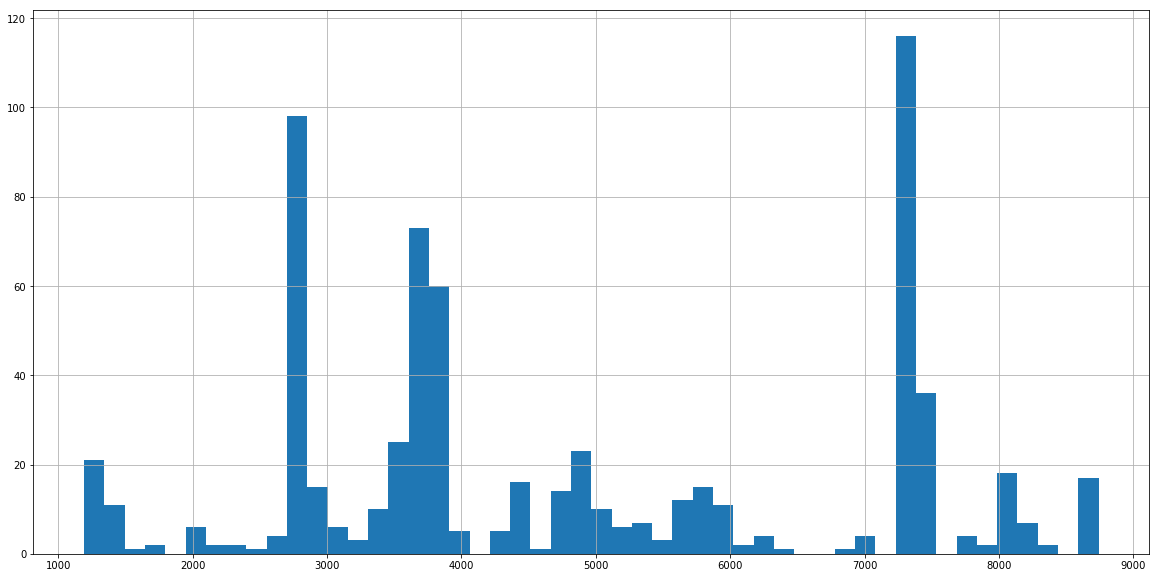

In [153]:
normalized_hist=normalized_df_copy.iloc[:,-3]
# normalized_hist.plot.hist(bins=50)
normalized_hist.hist(bins=50,figsize=(20,10))

In [154]:
#Note: See here: https://www.brookings.edu/wp-content/uploads/2016/06/specialization.pdf - "High Tech" companies are: SIC 357x, 36xx, 38xx, 737x
#Thus, we are going to bin as "High Tech" (using those 4 SIC codes) and "Non-High Tech" (using all other)

In [155]:
# #Creating Bins for ploting and understanding of the target 

# ## Binning for "High Tech" vs. "Non-High Tech"

def high_tech_bins(H):
    if (H >= 3570 and H < 3580) | (H >= 3600 and H < 3700) | (H >= 3800 and H < 3900) | (H >= 7370 and H < 7380):   # Creating a bin value of 1 for SICs in High Tech
        return(1)
    else:
        return(0)        #Creating a bin value of 0 for all others
   
normalized_df_copy['I3_tech'] = normalized_df_copy['I3'].apply(high_tech_bins)  # Creating a new column high_tech_bins in the dataframe

normalized_df_copy.head()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2,I3_tech
0,0.045151,0.671152,-0.572121,0.169230,-1.697078e-01,0.159680,-0.138702,0.650936,0.342634,0.942972,1.229957e-02,1.198013,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,0,1,1
1,-0.095730,-0.649765,-0.849182,0.230803,-1.322456e+00,0.796069,-0.159764,0.193821,-0.068812,-1.060477,-2.604629e-18,-0.738907,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,1,0,0
2,-0.499937,0.410889,-1.220193,0.117878,2.448351e-16,-1.017887,0.046763,0.672176,1.360811,-1.060477,-2.939239e-01,-0.738907,1.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,1,0,0
3,1.156133,0.389348,-1.184990,-1.264698,2.448351e-16,-0.634295,0.748176,1.016946,1.343418,-1.060477,-3.392135e-01,-0.738907,1.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,1,1,0
4,-0.696577,-1.320500,1.209611,-0.584969,-3.991537e-01,0.452826,-0.008078,-0.271432,-0.494301,0.942972,-7.031603e-02,0.745373,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,0,1,0


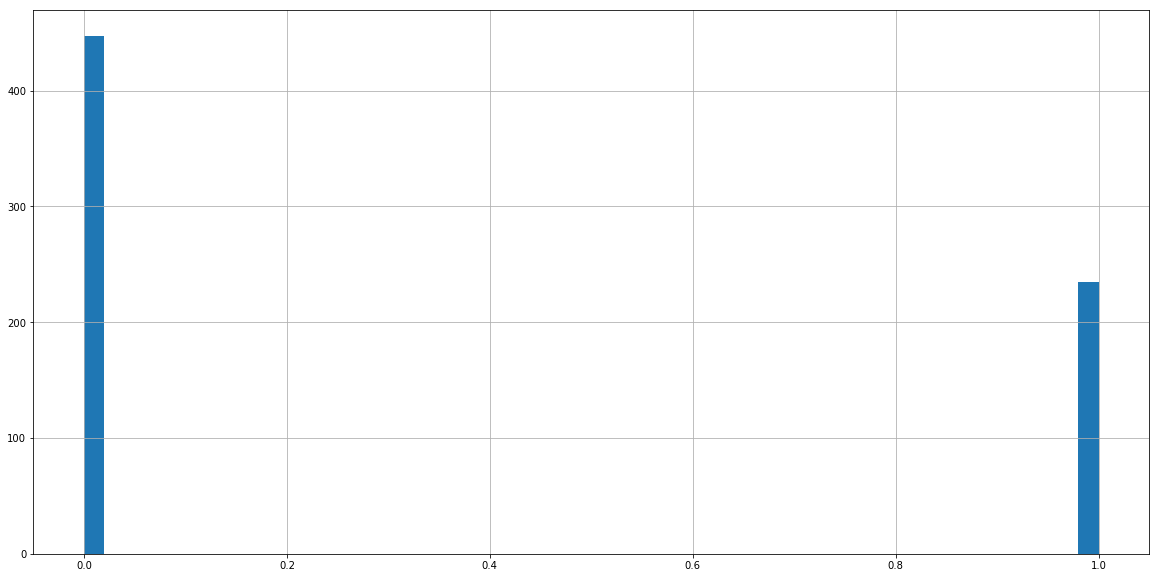

In [156]:
normalized_hist=normalized_df_copy.iloc[:,-1]
normalized_hist.hist(bins=50,figsize=(20,10))

In [157]:
#BINNING FOR MANUFACTURING VS SERVICES VS OTHER
#Note: See here: https://www.naics.com/sic-codes-industry-drilldown/ 
#Manufacturing --> SIC 20xx-3999; Services --> SIC 70xx-8999
#Thus, we are going to bin as "Manufacturing" (using SIC codes 20xx-3999),
#"Servies" (using SIC codes 70xx-8999) and "Other" (using all other)

In [158]:
# #Creating Bins for ploting and understanding of the target 

# ## Binning for "Manufacturing", "Service" and "Other"

def mfg_svc_other_bins(M):
    if (M >= 2000 and M < 4000):   # Creating a bin value of 1 for SICs in Manufacturing
        return(1)
    if (M >= 7000 and M < 9000):   # Creating a bin value of 2 for SICs in Service
        return(2)
    else:
        return(0)   # Creating a bin value of 0 for all others

normalized_df_copy['I3_mfg'] = normalized_df_copy['I3'].apply(mfg_svc_other_bins)  # Creating a new column mfg_svc_other_bins in the dataframe

normalized_df_copy.tail()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2,I3_tech,I3_mfg
677,5.209258e-18,-0.088679,1.574234e-01,-0.225740,0.760176,-0.312633,0.618704,1.190249,-0.185722,-1.060477,0.070637,1.617241,1.0,ZIP,ZIPCAR INC,7514.0,0,1,0,2
678,-3.528789e-01,1.593192,-8.558396e-01,0.265288,-0.049484,0.132906,0.467145,0.531986,0.694152,-1.060477,0.463900,-0.738907,1.0,ZLTQ,Zeltiq Aesthetics Inc,3845.0,1,1,1,1
679,-1.137136e-01,0.713216,-5.369393e-01,0.273593,-0.620240,0.104176,-0.549390,-0.219976,-0.582165,0.942972,-0.102401,-0.738907,0.0,ZSTN,"ZST Digital Networks, Inc.",3663.0,0,0,1,1
680,-7.378462e-01,0.771095,-1.378373e-01,1.172383,0.893120,-1.457806,1.018244,0.674936,-1.345586,0.942972,0.215115,1.567095,1.0,ZUMZ,Zumiez Inc,5600.0,0,0,0,0
681,-9.573025e-02,0.534566,8.595275e-17,0.599967,1.505024,0.027920,0.828347,0.444765,0.384452,0.942972,-0.378324,0.894755,1.0,ZZ,SEALY CORP,2510.0,0,0,0,1


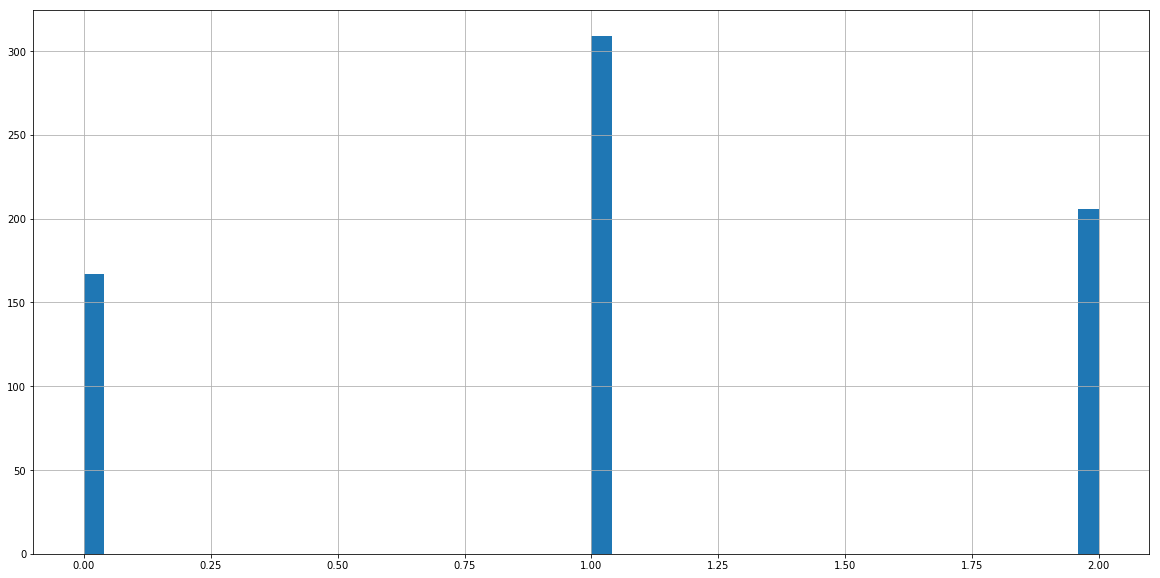

In [159]:
normalized_hist=normalized_df_copy.iloc[:,-1]
# normalized_hist.plot.hist(bins=50)
normalized_hist.hist(bins=50,figsize=(20,10))

# Feature Selection to reduce the columns
    * Split SIC Code to possibly use for feature engeneering near the end
  *  https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

In [160]:
#DWM NOTE: I'M NOT SURE WHERE TO PUT THIS IN THE NOTEBOOK - SO I'M PUTTING IT HERE - 

#Start by checking the datatypes for the df variables
normalized_df_copy.dtypes


C1_norm                           float64
C4_norm                           float64
C7_norm                           float64
Long_to_Total_Sentences_norm      float64
Pos_to_Total_Words_norm           float64
Neg_to_Total_Words_norm           float64
Uncertain_to_Total_Words_norm     float64
Real_to_Total_Words_norm          float64
Long_to_Total_Words_norm          float64
C3P_norm                          float64
C5P_norm                          float64
C6P_norm                          float64
C2                               category
I1                                 object
I2                                 object
I3                                float64
Y1                                 object
Y2                                 object
I3_tech                             int64
I3_mfg                              int64
dtype: object

In [161]:
#Need to change C2, Y1 and Y2 to floats

# normalized_df_copy["C2"] = pd.to_numeric(normalized_df_copy["C2"])
# normalized_df_copy["Y1"] = pd.to_numeric(normalized_df_copy["Y1"])
# normalized_df_copy["Y2"] = pd.to_numeric(normalized_df_copy["Y2"])

normalized_df_copy = normalized_df_copy.astype({"C2": float, "Y1": float, "Y2": float})

#re-check on datatypes:
normalized_df_copy.dtypes

C1_norm                          float64
C4_norm                          float64
C7_norm                          float64
Long_to_Total_Sentences_norm     float64
Pos_to_Total_Words_norm          float64
Neg_to_Total_Words_norm          float64
Uncertain_to_Total_Words_norm    float64
Real_to_Total_Words_norm         float64
Long_to_Total_Words_norm         float64
C3P_norm                         float64
C5P_norm                         float64
C6P_norm                         float64
C2                               float64
I1                                object
I2                                object
I3                               float64
Y1                               float64
Y2                               float64
I3_tech                            int64
I3_mfg                             int64
dtype: object

In [162]:
#### Check to see if any features are highly correlated with Y1...like we did in the Baseball Proj1, Pt2
normalized_df_copy.corr()['Y1']

C1_norm                          0.074802
C4_norm                         -0.066684
C7_norm                         -0.061488
Long_to_Total_Sentences_norm     0.070416
Pos_to_Total_Words_norm          0.100445
Neg_to_Total_Words_norm          0.178789
Uncertain_to_Total_Words_norm    0.075984
Real_to_Total_Words_norm         0.094551
Long_to_Total_Words_norm         0.115313
C3P_norm                        -0.083833
C5P_norm                        -0.052659
C6P_norm                        -0.761491
C2                              -0.062170
I3                              -0.086128
Y1                               1.000000
Y2                              -0.227029
I3_tech                         -0.071614
I3_mfg                          -0.011994
Name: Y1, dtype: float64

In [163]:
#### Sort Y1 correlations - highest to lowest
abs(normalized_df_copy.corr()['Y1']).sort_values(ascending=False).index

Index(['Y1', 'C6P_norm', 'Y2', 'Neg_to_Total_Words_norm',
       'Long_to_Total_Words_norm', 'Pos_to_Total_Words_norm',
       'Real_to_Total_Words_norm', 'I3', 'C3P_norm',
       'Uncertain_to_Total_Words_norm', 'C1_norm', 'I3_tech',
       'Long_to_Total_Sentences_norm', 'C4_norm', 'C2', 'C7_norm', 'C5P_norm',
       'I3_mfg'],
      dtype='object')

In [164]:
#### Check to see if any features are highly correlated with Y2...like we did in the Baseball Proj1, Pt2
normalized_df_copy.corr()['Y2']

C1_norm                         -0.026393
C4_norm                          0.103503
C7_norm                         -0.052109
Long_to_Total_Sentences_norm    -0.006550
Pos_to_Total_Words_norm         -0.053947
Neg_to_Total_Words_norm         -0.079097
Uncertain_to_Total_Words_norm    0.058428
Real_to_Total_Words_norm        -0.012229
Long_to_Total_Words_norm        -0.023033
C3P_norm                         0.018811
C5P_norm                         0.013187
C6P_norm                         0.236347
C2                               0.069761
I3                               0.105977
Y1                              -0.227029
Y2                               1.000000
I3_tech                          0.132479
I3_mfg                           0.128712
Name: Y2, dtype: float64

In [165]:
#### Sort Y1 correlations - highest to lowest
abs(normalized_df_copy.corr()['Y2']).sort_values(ascending=False).index

Index(['Y2', 'C6P_norm', 'Y1', 'I3_tech', 'I3_mfg', 'I3', 'C4_norm',
       'Neg_to_Total_Words_norm', 'C2', 'Uncertain_to_Total_Words_norm',
       'Pos_to_Total_Words_norm', 'C7_norm', 'C1_norm',
       'Long_to_Total_Words_norm', 'C3P_norm', 'C5P_norm',
       'Real_to_Total_Words_norm', 'Long_to_Total_Sentences_norm'],
      dtype='object')

In [166]:
# #Conclusion: the top common correlated variables are:
# #For Y1
# Neg_to_Total_Words_norm
# Long_to_Total_Words_norm
# C3_norm
# Pos_to_Total_Words_norm
# Real_to_Total_Words_norm
# Pos_Neg_Words_norm
# C5_norm
# C1_norm
# Long_to_Total_Sentences_norm
# C4_norm
# C2
# C7_norm
# C5P_norm
# P(mid)_norm
# C6_norm'

# #For Y2
# C4_norm
# Neg_to_Total_Words_norm
# Pos_Neg_Words_norm
# P(mid)_norm
# C2
# Pos_to_Total_Words_norm
# C7_norm
# C6_norm
# C3_norm
# C1_norm
# Long_to_Total_Words_norm
# C5_norm
# C5P_norm
# Real_to_Total_Words_norm
# Long_to_Total_Sentences_norm

In [167]:
#Given the above - here is what I suggest for our "tries" - on the basis of the highest correlations (absolute values) with Y1 and Y2:
#1 - Use (just):
#Neg_to_Total_Words_norm

#2 - Try:
#Neg_to_Total_Words_norm
#C4_norm
#Pos_Neg_Words_norm
#Pos_to_Total_Words_norm
#C3_norm

#3 - Try:
#Neg_to_Total_Words_norm
#C4_norm
#Pos_to_Total_Words_norm
#C3_norm

#4 - Try:
#C4_norm
#Pos_Neg_Words_norm
#C3_norm

#5 - Try #2 plus 2 more variables (Long_to_Total_Words_norm and C2)...although this gives 7(!) variables:
#Neg_to_Total_Words_norm
#C4_norm
#Pos_Neg_Words_norm
#Pos_to_Total_Words_norm
#C3_norm
#Long_to_Total_Words_norm
#C2

#6 - Try #3 plus 2 more variables (Long_to_Total_Words_norm and C2)...although this gives 6(!) variables:
#Neg_to_Total_Words_norm
#C4_norm
#Pos_to_Total_Words_norm
#C3_norm
#Long_to_Total_Words_norm
#C2

#7 - Try:
#C4_norm
#Pos_Neg_Words_norm
#C3_norm
#Long_to_Total_Words_norm
#C2



In [168]:
#END OF DWM WORK - 022320 - WHOOPS, IT'S NOW 022420!

In [169]:
#df_copy['I3'].str.split(n=4)
#You loaded the data in a DataFrame object called dataframe now.

#Let's convert the DataFrame object to a NumPy array to achieve faster computation. 
#Also, let's segregate the data into separate variables so that the features and the labels are separated.

#array = dataframe.values
#X = array[:,0:8] #features
#Y = array[:,8] #target

In [170]:
# # Import the necessary libraries first
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

In [171]:
# # Feature extraction
# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(X, Y)

# # Summarize scores
# np.set_printoptions(precision=3)
# print(fit.scores_)

# features = fit.transform(X)
# # Summarize selected features
# print(features[0:5,:])

# Export to CSV to be evaluated

In [172]:
#from openpyxl.workbook import Workbook
normalized_df_copy.to_csv("output_eval_mid.csv",index=False)

In [173]:
#col_list_inverse = df_impute_copy.iloc[:,[0,1,2,3,8,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72]].columns.tolist()
#col_list_sqrt
#col_list_log
#col_list_inverse

# Example Evaluation Code

This notebook will be very __similar__ to the code I use to evaluate your results - it is provided for __your convenience__ so that you can use it to evaluate your preprocessing results at any time before your __final submission__.

Please note that the results here will __NOT__ be the same as my evaluation results.

Let's start with loading the required packages.

In [174]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

Next you should load __your__ data. In this case, I am using a sample dataset (`GroupX.csv`) which contains 6 predictors (`X1 - X6`) and two target variables (`Y1, Y2`).

Please make sure you change the data to your __OWN__ dataset when using this code.

__NOTE__:
1. Your dataset maybe very different from the sample dataset.
2. Please follow this structure when submitting your dataset.

In [175]:
data = pd.read_csv('output_eval_mid.csv', header=0)
data.head()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2,I3_tech,I3_mfg
0,0.045151,0.671152,-0.572121,0.169230,-1.697078e-01,0.159680,-0.138702,0.650936,0.342634,0.942972,1.229957e-02,1.198013,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,0.0,1.0,1,1
1,-0.095730,-0.649765,-0.849182,0.230803,-1.322456e+00,0.796069,-0.159764,0.193821,-0.068812,-1.060477,-2.604629e-18,-0.738907,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,1.0,0.0,0,1
2,-0.499937,0.410889,-1.220193,0.117878,2.448351e-16,-1.017887,0.046763,0.672176,1.360811,-1.060477,-2.939239e-01,-0.738907,1.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,1.0,0.0,0,1
3,1.156133,0.389348,-1.184990,-1.264698,2.448351e-16,-0.634295,0.748176,1.016946,1.343418,-1.060477,-3.392135e-01,-0.738907,1.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,1.0,1.0,0,1
4,-0.696577,-1.320500,1.209611,-0.584969,-3.991537e-01,0.452826,-0.008078,-0.271432,-0.494301,0.942972,-7.031603e-02,0.745373,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,0.0,1.0,0,0


Checking your data types and make sure it follows the data dictionary would be an important step, you can do that using the `.dtypes` attribute.

__NOTE__: all __continuous__ faetures will be in `float64` data type, and all __categorical__ features will be in `int64` data type (given you already coded (per __suggest task \#6__ in the competition document) them).

In [176]:
data.dtypes

C1_norm                          float64
C4_norm                          float64
C7_norm                          float64
Long_to_Total_Sentences_norm     float64
Pos_to_Total_Words_norm          float64
Neg_to_Total_Words_norm          float64
Uncertain_to_Total_Words_norm    float64
Real_to_Total_Words_norm         float64
Long_to_Total_Words_norm         float64
C3P_norm                         float64
C5P_norm                         float64
C6P_norm                         float64
C2                               float64
I1                                object
I2                                object
I3                               float64
Y1                               float64
Y2                               float64
I3_tech                            int64
I3_mfg                             int64
dtype: object

Now you need to specify your targets and predictors. __NOTE__ we have two targets here (`Y1, Y2`).

In [177]:
y1 = data.Y1
y2 = data.Y2

Check the shape of the data.

In [178]:
data.shape

(682, 20)

It is very possible that you will use different sets of the predictors for `Y1` and `Y2`. Now let's define them.

First, let's define predictors for `Y1` - which will be the first 5 features in `data`.

In [179]:
cols = list(data.columns)
# first 5 features 
cols[:-2]

['C1_norm',
 'C4_norm',
 'C7_norm',
 'Long_to_Total_Sentences_norm',
 'Pos_to_Total_Words_norm',
 'Neg_to_Total_Words_norm',
 'Uncertain_to_Total_Words_norm',
 'Real_to_Total_Words_norm',
 'Long_to_Total_Words_norm',
 'C3P_norm',
 'C5P_norm',
 'C6P_norm',
 'C2',
 'I1',
 'I2',
 'I3',
 'Y1',
 'Y2']

Use below code to select the first 5 features as predictors for `Y1`.

In [180]:
predictors_y1 = data[cols[:-5]]
predictors_y1.head()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2
0,0.045151,0.671152,-0.572121,0.169230,-1.697078e-01,0.159680,-0.138702,0.650936,0.342634,0.942972,1.229957e-02,1.198013,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC
1,-0.095730,-0.649765,-0.849182,0.230803,-1.322456e+00,0.796069,-0.159764,0.193821,-0.068812,-1.060477,-2.604629e-18,-0.738907,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC
2,-0.499937,0.410889,-1.220193,0.117878,2.448351e-16,-1.017887,0.046763,0.672176,1.360811,-1.060477,-2.939239e-01,-0.738907,1.0,ACAD,ACADIA PHARMACEUTICALS INC
3,1.156133,0.389348,-1.184990,-1.264698,2.448351e-16,-0.634295,0.748176,1.016946,1.343418,-1.060477,-3.392135e-01,-0.738907,1.0,ACHN,ACHILLION PHARMACEUTICALS INC
4,-0.696577,-1.320500,1.209611,-0.584969,-3.991537e-01,0.452826,-0.008078,-0.271432,-0.494301,0.942972,-7.031603e-02,0.745373,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.


Upon investigation of the data, we know we have __six__ features (`X1 - X6`) predicting `Y2`. Use similar code (as below) to select them.

In [181]:
predictors_y2 = data[cols[:-5]]
predictors_y2.head()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2
0,0.045151,0.671152,-0.572121,0.169230,-1.697078e-01,0.159680,-0.138702,0.650936,0.342634,0.942972,1.229957e-02,1.198013,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC
1,-0.095730,-0.649765,-0.849182,0.230803,-1.322456e+00,0.796069,-0.159764,0.193821,-0.068812,-1.060477,-2.604629e-18,-0.738907,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC
2,-0.499937,0.410889,-1.220193,0.117878,2.448351e-16,-1.017887,0.046763,0.672176,1.360811,-1.060477,-2.939239e-01,-0.738907,1.0,ACAD,ACADIA PHARMACEUTICALS INC
3,1.156133,0.389348,-1.184990,-1.264698,2.448351e-16,-0.634295,0.748176,1.016946,1.343418,-1.060477,-3.392135e-01,-0.738907,1.0,ACHN,ACHILLION PHARMACEUTICALS INC
4,-0.696577,-1.320500,1.209611,-0.584969,-3.991537e-01,0.452826,-0.008078,-0.271432,-0.494301,0.942972,-7.031603e-02,0.745373,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.


Below is the key part of this notebook - which generates a `logistic regression` model to predict `Y1`/`Y2`.

The code works this way:

1. We generate two lists `f1_score_lst` and `auc_lst` to store f1_score and AUC from each of the `10` runs of the model;
2. Define model:
    1. We define a `LogisticRegression()` model;
    
    2. We split predictors (`predictors_y1`) and target `y1` to training (80%) and testing (20%);
    
    3. We fit the model `clf` to the training data, then use it to predict on the testing data;
    
    4. We also defined a `10-fold cross validation` to make sure our model do not overfit - see [here](https://scikit-learn.org/stable/modules/cross_validation.html) for more info;
    
    5. We append the f1_score and AUC of current model to the lists (`f1_score_lst` and `auc_lst`) we defined earlier.
  
3. Print out average f1_score and AUC for all 10 runs;
4. Print out average average accuracy from cross validation
5. Print out confusion matrix and classification report for the __last__ model.

__NOTE__: Step 3 provides the evaluation results we need; step 4 - 5 can be used to verify the results from step 3.

In [184]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    #Model building
    clf = LogisticRegression()
    X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=123)
    clf.fit(X1_train, y1_train)

    y1_pred = clf.predict(X1_test)

    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf, X1_train, y1_train, cv=kfold, scoring=scoring)

    

    
    #calculate f1-score and AUC
    
    clf_roc_auc = roc_auc_score(y1_test, y1_pred)
    f1_score_lst.append(precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y1 = confusion_matrix(y1_test, y1_pred)


#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X1_test, y1_test)))

print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))

print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y1)

print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y1_test, y1_pred))


ValueError: could not convert string to float: 'RSC Holdings Inc.'

Below code are used to evaluate model toward `Y2`. It is very similar to the code above - key difference is that `Y2` is imbalanced - so I wrote some code (under `# Begin oversampling`) to deal with that.

In [183]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    #Model building
    clf1 = LogisticRegression()

    
    # Splitting data into testing and training
    X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=123)
    
    # Begin oversampling
    oversample = pd.concat([X2_train,y2_train],axis=1)
    max_size = oversample['Y2'].value_counts().max()
    lst = [oversample]
    for class_index, group in oversample.groupby('Y2'):
        lst.append(group.sample(max_size-len(group), replace=True))
    X2_train = pd.concat(lst)
    y2_train=pd.DataFrame.copy(X2_train['Y2'])
    del X2_train['Y2']
    
    # fitting model on oversampled data
    clf1.fit(X2_train, y2_train)
    
    y2_pred = clf1.predict(X2_test)
    
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf1, X2_train, y2_train, cv=kfold, scoring=scoring)
    
    #calculate f1-score and AUC
    
    clf1_roc_auc = roc_auc_score(y2_test, y2_pred)
    
    
    #calculate average f1-score and AUC
    f1_score_lst.append(precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2])
    auc_lst.append(clf1_roc_auc)
    
    
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)


print('Accuracy of classifier on test set: {:.3f}'.format(clf1.score(X2_test, y2_test)))

print("10-fold cross validation average accuracy of clf1: %.3f" % (results.mean()))

print('Confusion Matrix for Classfier:')
print(confusion_matrix_y2)

print('Classification Report for Classfier:')
print(classification_report(y2_test, y2_pred))


ValueError: could not convert string to float: 'OSIRIS THERAPEUTICS, INC. '

# THE END (All code below is the sandbox)

In [ ]:
#df_copy['I3'].str.split(n=4)

In [ ]:
#use histogram to visualize the # of observations for IPO prices
df_impute_copy['P(IPO)'].hist (bins=20)
#use histogram to visualize the # of observations for IPO 1Day prices
df_impute_copy['P(1Day)'].hist (bins=20)

In [ ]:
#for feature in col_list: 
 #   print(plt.pyplot.hist(df_copy[feature], bins=10,range=[0,40]))


In [ ]:
#plt.pyplot.hist(df_copy[col_list], bins=10, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, data=None)

In [ ]:
#To filter out only continuous columns
#float_cols = col_list
#replacement = df_copy.loc[:,float_cols]
#print(replacement)

In [ ]:
#sm.qqplot(df_copy['C7'])

In [ ]:
#box_plot = plt.figure(figsize=(4,3))
#ax1 = box_plot.add_subplot(1,1,1)
#ax1.boxplot(
    # first argument is the data
    # since we are plotting over two pieces of data
    # we have to put each piece of data into a list
    #[tips[tips.sex == 'Female']['tip'],
     #tips[tips.sex == 'Male']['tip']],
    # we can pass in optional parameter to label the data
    #labels = ['Female', 'Male'])
#ax1.set_xlabel('Sex')
#ax1.set_ylabel('Tip')
#ax1.set_title('Tips by Sex in boxplot')
#box_plot.show()

In [ ]:
# Create the random variables with mean 5, and sd 3
#x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
#x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
#x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
#x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)# Print the p values
#print (stats.shapiro(p_df))
#print stats.shapiro(x_50)
#print stats.shapiro(x_100)
#print stats.shapiro(x_1000)
# Skew will be easier to determine the normalization df.skew()

In [ ]:
#if norm_df[feature].skew()>0.5:
 #       norm_df[norm_name] = np.cbrt(norm_df[feature]
  #  elif norm_df[feature].skew()<-0.5:
   #     norm_df[norm_name] = np.power(norm_df[feature],2)
    #else: norm_df[norm_name] = norm_df[feature]

In [ ]:
#for feature in norm_sublist:
 #   norm_name = (feature + "_norm")
  #  if norm_df[feature].skew() >0.5:
   #     norm_df[norm_name] = np.cbrt(norm_df[feature])
    #elif norm_df[feature].skew() < -0.5:
   #                             norm_df[norm_name] = np.power(norm_df[feature],2)
   # else: norm_df[norm_name] = norm_df[feature]
#norm_df 
#for feature in norm_sublist:  
 #   if norm_df[feature].skew() > 0.5:
  #      norm_df[feature] = np.cbrt(norm_df[feature]
   # elif norm_df[feature].skew() < -0.5:
    #    norm_df[feature] = np.power(norm_df[feature],2)
    #else: norm_df[feature] = norm_df[feature]

In [ ]:
#for feature in eval_list:
 #   print(df_eval_base[feature])

In [ ]:
# import required packages for splitting data
#from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split

# import required packages for evaluating models
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#rom sklearn.metrics import roc_auc_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing

# import `logistic regression` model
#from sklearn.linear_model import LogisticRegression

In [ ]:
# # Create new normalized columns
# norm_list =[]
# for col in eval_list:
#     norm_name = col + "_norm"
#     norm_list.append(norm_name) 
# norm_list

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the log of the original columns
# log_col_list =[]
# for col in col_list:
#     col="log_"+col
#     log_col_list.append(col)
# log_col_list
# df_impute_copy[log_col_list] = np.log(df_impute_copy[col_list])
# df_impute_copy.info()

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the sqrt of the original columns
# sqrt_col_list =[]
# for col in col_list:
#     col="sqrt_"+col
#     sqrt_col_list.append(col)
# log_col_list
# df_impute_copy[sqrt_col_list] = np.sqrt(df_impute_copy[col_list])
# df_impute_copy.info()

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the inverse of the original columns
# inverse_col_list =[]
# for col in col_list:
#     col="inverse_"+col
#     inverse_col_list.append(col)
# log_col_list
# df_impute_copy[inverse_col_list] = 1/(df_impute_copy[col_list])
# df_impute_copy.info()

# THE WAY FORWARD TO THE LIGHT

Prework: Handle missing data, dashes, inconsistant data, 
    
    1. Selected Imputation methods by column
       - Get code from Dawn
       - mean, median, mode
    2. Normalize
       - Code from Brian
           - Sqrt
           - Log
           - 1/X
       - Impute again for inf errors
    3. Add calculated fields (Mike to provide code)
       - Y1
       - Y2
       - C3'
       - C5'
       - C6'
    4. Correlation + Heat map from Mike
       - Pearson
       - Kendall
       - Spearman
    5. Reduce to selected independent variables
       - Use Correlation methods to eliminate Fields
       - Use Feature Importance to determine which ones to keep
       - Feature Engeneering of P/Sales ratio
       - make some fields bianary
    6. Run evaluation code

# Calculated Fields (Where we stopped)

In [ ]:
# #Create variable true_value for C6P
# # Add T1 T4/T1 S1 = S1/S2 Calcualte all the ratios for the Ts & S Colums
# true_value = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100

# #Create new columns
# #Add them to df_alternate_copy
# #Create P(mid) variable
# df_alt_copy['P(mid)'] = (df_alt_copy['P(H)'] + df_alt_copy['P(L)']) / 2
# df_alt_copy['C3P'] = np.where(df_alt_copy['C3'] > 0, '1', '0')
# df_alt_copy['C5P'] = df_alt_copy['C5'] / df_alt_copy['C6']
# df_alt_copy['C6P'] = np.where(df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)'], true_value, '0')
# df_alt_copy['Y1'] = np.where(df_alt_copy['P(IPO)'] < df_alt_copy['P(mid)'], '1', '0')
# df_alt_copy['Y2'] = np.where(df_alt_copy['P(IPO)'] < df_alt_copy['P(1Day)'], '1', '0')




# #if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
#     #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
# #else :
#     #df_alt_copy['C6P'] = 0

# df_alt_copy.head()

In [81]:
# normalized_df.apply(func=norm_df_outlier, axis=0)

C1_norm                            ([1.0052372512045877], [1.0086990203451112])
C3_norm                                                          ([nan], [nan])
C4_norm                         ([-0.07978998452796494], [0.09737892822443289])
C5_norm                            ([1.0226750577222266], [1.0284988863914775])
C6_norm                            ([1.0209196123986382], [1.0261371449054137])
C7_norm                            ([1.0011750820974543], [1.0126501932715828])
P(mid)_norm                         ([1.0030150285775503], [1.004708829609427])
Long_to_Total_Sentences_norm       ([0.4376077722453211], [0.8171980525933258])
Pos_to_Total_Words_norm            ([0.9910975422671495], [0.9934821064416439])
Neg_to_Total_Words_norm            ([0.9918745027667675], [0.9942291298948662])
Pos_Neg_Words_norm                   ([0.99764586898815], [1.0008030988107979])
Long_to_Total_Words_norm           ([0.9951579925714189], [0.9961753949708612])
Real_to_Total_Words_norm           ([0.9

In [ ]:
# getting the upper boundary using 3 standard deviation
# you should also get the lower boundary
# You can also set the boundaries using IQR
# u_bound = normalized_df.mean() + 3* normalized_df.std()
# print(u_bound)

In [ ]:
# detecting any values are greater than the upper boundary
# norm_df[norm_df>u_bound].count()

In [134]:
# going for all the columns
# for col in normalized_df.columns:
#     u_bound = normalized_df[col].mean() + 3* normalized_df[col].std()
#     normalized_df[col][normalized_df[col] > u_bound] = u_bound

In [ ]:
# Replace the values greater than the upper boundary with the upper boundary
# normalized_df[normalized_df>u_bound] = u_bound

In [135]:
# detecting any values are greater than the upper boundary
# normalized_df[norm_df>u_bound].count()

C1_norm                         671
C3_norm                          11
C4_norm                           0
C5_norm                         682
C6_norm                         682
C7_norm                         589
P(mid)_norm                      84
Long_to_Total_Sentences_norm      1
Pos_to_Total_Words_norm           0
Neg_to_Total_Words_norm           0
Pos_Neg_Words_norm                0
Long_to_Total_Words_norm          1
Real_to_Total_Words_norm          0
C5P_norm                          6
dtype: int64

In [373]:
# x = normalized_df_copy.shape[0]
# y = normalized_df_copy.shape[1]

In [374]:
# #z-score standardization  #I think this works
# #import package
# from scipy.stats import zscore
# #normalize
# norm_df = norm_df.apply(zscore)
# #print results
# print(norm_df.describe())

In [375]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# print(scaler.fit(normalized_df_copy))
# StandardScaler()
# print(scaler.mean_)
# print(scaler.transform(normalized_df_copy))
# print(scaler.transform(x,y))
# normalized_df_copy